In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pystan
%matplotlib inline

/Users/yuki.ohnishi/.pyenv/versions/analysis/lib/python3.5/site-packages/Cython/Distutils/old_build_ext.py:30: UserWarning: Cython.Distutils.old_build_ext does not properly handle dependencies and is deprecated.
  "Cython.Distutils.old_build_ext does not properly handle dependencies "


#### 9.2 ベクトル化による高速化

In [3]:
df1 = pd.read_csv("../../chap04/ohnishi/input/data-salary.txt")

In [5]:
data1 = {"N":len(df1), "X":df1.X, "Y":df1.Y}
fit1 = pystan.stan(file="stan/model9-1b.stan", data=data1, seed=1234)

In [6]:
fit1

Inference for Stan model: anon_model_ad1146c34cfdc09431fe8c299ecc514a.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      -116.7    2.25  74.49 -260.3 -166.1 -116.9 -70.59  37.44   1099    1.0
b       21.83    0.05   1.66  18.37  20.82  21.85  22.91  25.06   1076    1.0
sigma   85.06    0.39  15.56  60.72  73.91  82.83  93.89 122.08   1576    1.0
mu[0]  407.11    1.05  37.33  333.6  382.5 406.65 431.12 483.29   1258    1.0
mu[1]  407.11    1.05  37.33  333.6  382.5 406.65 431.12 483.29   1258    1.0
mu[2]  450.77    0.95   34.5 382.29 427.76 450.53 472.95 520.53   1305    1.0
mu[3]  581.74    0.67  26.69 527.72 563.93 581.42 599.16 634.81   1590    1.0
mu[4]  603.57    0.62  25.53 552.34 586.56 603.35 619.87 654.56   1677    1.0
mu[5]  647.23    0.53  23.41 599.22 631.87  647.2  662.6 693.24   1921    1.0
mu[6]  712.71     0.4   20.8  6

In [7]:
df2 = pd.read_csv("../../chap08/ohnishi/input/data-salary-2.txt")

In [9]:
data2 = {"N":len(df2), "K":len(df2.KID.unique()),"X":df2.X, "Y":df2.Y, "KID":df2.KID}
fit2 = pystan.stan(file="stan/model8-4b.stan", data=data2, seed=1234)

In [10]:
fit2

Inference for Stan model: anon_model_3a0163e784831c6c9087f23573c4366c.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a0   381.82    2.74 109.26 180.08 338.58 365.71 412.39  641.4   1594    1.0
a[0] 382.86    0.59  14.79 351.68  373.2 383.28  392.8  411.5    630    1.0
a[1] 334.85    0.42  17.27 301.81 322.93 334.66 346.53 367.83   1660    1.0
a[2] 324.06    0.85  32.97 258.14 302.65 324.15 347.71 385.88   1521    1.0
a[3] 477.36    5.24 130.06 300.46 377.51 447.44 556.92 780.59    615    1.0
b0    12.16    0.23    7.2  -2.54   9.45  12.26   15.0  27.37   1008    1.0
b[0]   7.76    0.03   0.89   5.97   7.18   7.76   8.36   9.49   1022    1.0
b[1]   19.4    0.03   1.27  16.84  18.56  19.39  20.22  21.87   2014    1.0
b[2]  11.98    0.04   1.63   8.88  10.84  11.95  13.05  15.25   1545    1.0
b[3]   9.95    0.21   5.22  -2.23   6.79  11.15  13

In [11]:
df3 = pd.read_csv("../../chap08/ohnishi/input/data-conc-2.txt")

In [12]:
time = [1,2,4,8,12,24]
Time_new = np.arange(0,25)
data3 = {"N":len(df3), "T":len(time), "Time":time, "Y":df3.iloc[:,1:].values, "T_new":len(Time_new), "Time_new":Time_new}
fit3 = pystan.stan(file="stan/model8-7b.stan", data=data3, seed=1234)

In [13]:
fit3

Inference for Stan model: anon_model_cd248e5093d1a1c69977689e6090ad68.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a0             2.86  1.8e-3   0.11   2.64    2.8   2.87   2.94   3.07   3634    1.0
b0            -1.18  2.4e-3   0.12  -1.44  -1.26  -1.18   -1.1  -0.96   2568    1.0
log_a[0]       2.56  1.6e-3   0.09   2.38    2.5   2.57   2.62   2.74   3466    1.0
log_a[1]       2.11  2.4e-3   0.14   1.84   2.02   2.11    2.2   2.39   3373    1.0
log_a[2]       3.17  8.6e-4   0.05   3.07   3.14   3.17   3.21   3.27   3421    1.0
log_a[3]       3.25  7.6e-4   0.04   3.17   3.22   3.25   3.29   3.34   3461    1.0
log_a[4]       2.64  2.1e-3   0.11   2.43   2.57   2.64   2.71   2.86   2592    1.0
log_a[5]       2.75  1.8e-3   0.09   2.58   2.69   2.74   2.81   2.94   2763    1.0
log_a[6]       2.69  1.5e-3   0.09   2.52   2.63   2.69

#### 9.3 ベクトルや行列の数学的性質の利用

In [14]:
df4 = pd.read_csv("input/data-mvn.txt")

In [16]:
df4.head()

,Y1,Y2
0,9.2,2.56
1,9.8,1.99
2,9.4,2.40
3,9.2,2.27
4,8.1,3.68


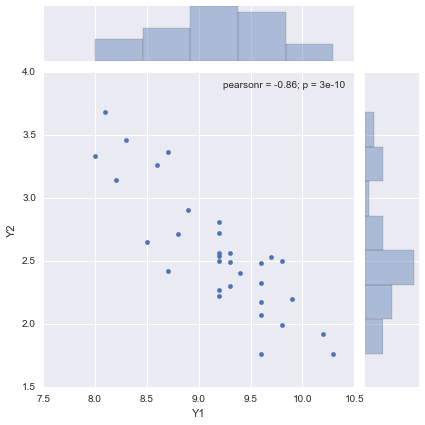

In [19]:
sns.jointplot(x="Y1",y="Y2",data=df4)

In [23]:
data4 = {"N":df4.shape[0], "D":df4.shape[1], "Y":df4}
fit4 = pystan.stan(file="stan/model9-2.stan", data=data4, seed=1234)

In [24]:
fit4

Inference for Stan model: anon_model_1d7a2bd6cfeda46b66dc52543e99974e.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mn[0]       9.2  2.6e-3   0.11   8.98   9.13    9.2   9.27   9.41   1686    1.0
mn[1]      2.56  2.2e-3   0.09   2.38    2.5   2.56   2.62   2.74   1737    1.0
cov[0,0]   0.42  3.0e-3   0.13   0.25   0.34    0.4   0.49   0.75   1739    1.0
cov[1,0]   -0.3  2.4e-3    0.1  -0.55  -0.35  -0.28  -0.24  -0.17   1537    1.0
cov[0,1]   -0.3  2.4e-3    0.1  -0.55  -0.35  -0.28  -0.24  -0.17   1537    1.0
cov[1,1]   0.29  2.1e-3   0.08   0.17   0.23   0.28   0.33   0.51   1595    1.0
lp__      25.31    0.04    1.6  21.46   24.5  25.64  26.47  27.44   1630    1.0

Samples were drawn using NUTS at Fri Dec  2 23:02:09 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reductio

#### 9.3.2 行列演算を使った重回帰

In [41]:
df5 = pd.read_csv("input/data-attendance-5.txt")
df5["Score"]  = df5["Score"]  / 200
df5["intercept"] = 1

In [43]:
df5.head()

,A,Score,X3,X4,Y,intercept
0,0,0.345,-0.56,1.20,0.286,1
1,1,0.725,-0.23,0.67,0.196,1
2,0,0.625,1.56,0.98,0.261,1
3,1,0.430,0.07,1.91,0.109,1
4,1,0.790,0.13,0.97,0.230,1


In [44]:
X = df5.drop("Y", axis=1)
data5 = {"N":X.shape[0], "D":X.shape[1], "X":X, "Y":df5.Y}
fit5 = pystan.stan(file="stan/model9-3.stan", data=data5, seed=1234)

In [45]:
fit5

Inference for Stan model: anon_model_3679336c55bbd9848708484b28a37430.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b[0]    -0.14  2.6e-4   0.02  -0.17  -0.15  -0.14  -0.13  -0.11   3454    1.0
b[1]     0.32  1.1e-3   0.06   0.22   0.28   0.32   0.36   0.43   2358    1.0
b[2]  -3.1e-3  1.5e-4 8.3e-3  -0.02-8.3e-3-3.0e-3 2.3e-3   0.01   3212    1.0
b[3]    -0.01  2.4e-4   0.01  -0.04  -0.02  -0.01-4.0e-3   0.01   3028    1.0
b[4]     0.14  8.2e-4   0.04   0.06   0.11   0.14   0.17   0.21   2253    1.0
sigma    0.05  1.2e-4 5.9e-3   0.04   0.05   0.05   0.06   0.07   2617    1.0
mu[0]    0.24  3.2e-4   0.02    0.2   0.22   0.24   0.25   0.27   2946    1.0
mu[1]    0.22  2.4e-4   0.01   0.19   0.21   0.22   0.23   0.25   3581    1.0
mu[2]    0.32  2.6e-4   0.02   0.29   0.31   0.32   0.33   0.35   3471    1.0
mu[3]    0.11  2.9e-4   0.02   

#### 9.4 パラメータの制約

In [46]:
df6 = pd.read_csv("input/data-dice.txt")

In [47]:
df6.head(2)

,Face
0,1
1,2


###### categorical

In [48]:
data6 = {"N":df6.shape[0], "K":len(df6.Face.unique()), "Y":df6.Face}
fit6 = pystan.stan(file="stan/model9-4.stan", data=data6, seed=1234)

In [50]:
fit6

Inference for Stan model: anon_model_3e9ca36352d7dc10e5aeae7eff28adae.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta[0]   0.11  3.5e-4   0.02   0.07   0.09   0.11   0.12   0.15   3337    1.0
theta[1]   0.37  5.3e-4   0.03   0.31   0.35   0.37   0.39   0.43   3647    1.0
theta[2]    0.1  3.4e-4   0.02   0.07   0.09    0.1   0.11   0.15   3600    1.0
theta[3]   0.25  4.9e-4   0.03    0.2   0.23   0.25   0.27   0.31   3427    1.0
theta[4]    0.1  3.2e-4   0.02   0.06   0.08    0.1   0.11   0.14   3716    1.0
theta[5]   0.07  3.0e-4   0.02   0.04   0.06   0.07   0.08   0.11   3271    1.0
lp__     -332.7    0.03   1.46 -336.5 -333.4 -332.4 -331.6 -330.8   2000    1.0

Samples were drawn using NUTS at Fri Dec  2 23:35:39 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reductio

###### multinomial

In [58]:
Y95 = df6.Face.value_counts().sort_index()
data7 = {"K":len(df6.Face.unique()), "Y":Y95}
fit7 = pystan.stan(file="stan/model9-5.stan", data=data7, seed=1234)

In [59]:
fit7

Inference for Stan model: anon_model_c35d6ed8851b3dc7cd69b04ed6082b7f.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta[0]   0.11  3.5e-4   0.02   0.07   0.09   0.11   0.12   0.15   3499    1.0
theta[1]   0.37  5.7e-4   0.03   0.31   0.35   0.37   0.39   0.43   3160    1.0
theta[2]    0.1  3.4e-4   0.02   0.07   0.09    0.1   0.11   0.15   3492    1.0
theta[3]   0.25  4.9e-4   0.03    0.2   0.23   0.25   0.27   0.31   3478    1.0
theta[4]    0.1  3.2e-4   0.02   0.06   0.08    0.1   0.11   0.14   3699    1.0
theta[5]   0.07  2.9e-4   0.02   0.04   0.06   0.07   0.08   0.11   3511    1.0
lp__     -332.7    0.03    1.5 -336.5 -333.4 -332.4 -331.6 -330.8   2009    1.0

Samples were drawn using NUTS at Fri Dec  2 23:43:16 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reductio

#### その他の制約

In [63]:
standata="""
parameters {
  real<lower=-1, upper=3> a;
  real<lower=0> b;
}

model {
  a ~ normal(0,1);
  b ~ student_t(4, 0, 1);
}
"""
fit8 =  pystan.stan(model_code=standata)

In [65]:
ms8 = fit8.extract()

/Users/yuki.ohnishi/.pyenv/versions/analysis/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


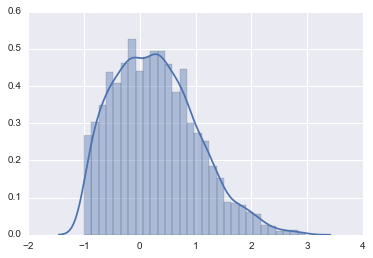

In [66]:
sns.distplot(ms8["a"])

/Users/yuki.ohnishi/.pyenv/versions/analysis/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


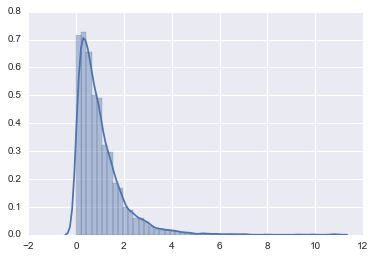

In [67]:
sns.distplot(ms8["b"])

#### 9.5 トラブルシューティング

In [2]:
df7 = pd.read_csv("input/data-conc-2-NA-wide.txt")
df8 = pd.read_csv("input/data-conc-2-NA-long.txt")

In [3]:
df7.head()

,PersonID,Time1,Time2,Time4,Time8,Time12,Time24
0,1,2.4,NaN,7.5,11.9,12.5,NaN
1,2,NaN,3.9,4.4,7.7,6.4,8.3
2,3,5.2,9.4,19.4,NaN,NaN,NaN
3,4,6.7,12.6,19.1,23.4,25.8,26.1
4,5,0.3,4.7,7.0,10.2,12.9,14.8


In [4]:
df8.head()

,PersonID,TimeID,Y
0,1,1,2.4
1,3,1,5.2
2,4,1,6.7
3,5,1,0.3
4,6,1,6.3


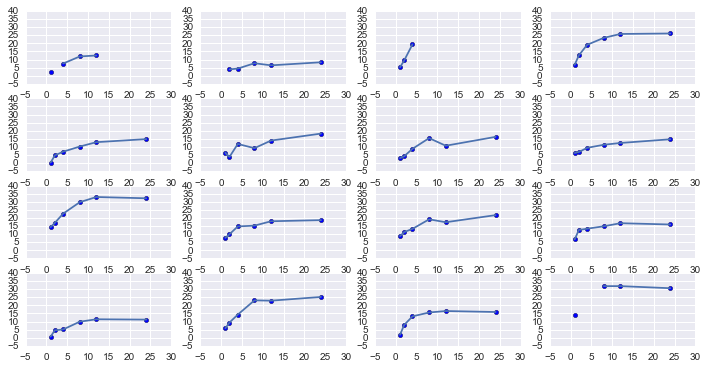

In [8]:
fig = plt.figure(figsize=(12,6))
time = [1,2,4,8,12,24]
for i in df7.PersonID:
    ax = fig.add_subplot(4,4,i,sharex=ax, sharey=ax)
    ax.scatter(time, df7.iloc[i -1,1:].values)
#     ax.plot(time, df7.iloc[i -1,1:].values)

In [21]:
I = df8.shape[0]
N = len(df8.PersonID.unique())
T = len(df8.TimeID.unique())
Time = [1,2,4,8,12,24]
PersonID = df8.PersonID
TimeID = df8.TimeID
Y = df8.Y
data8 = {"I":I, "N":N, "T":T, "Time":Time, "PersonID":PersonID, "TimeID":TimeID, "Y":Y}
fit8 = pystan.stan(file="stan/model9-6.stan", data=data8, seed=1234)

In [23]:
fit8

Inference for Stan model: anon_model_eef9a55423f4bba07a09ebcdfa7bc4f4.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a0        -3.8e5   4.4e5  7.6e5 -2.5e6 -4.8e4   2.83   2.92   3.08      3   3.23
b0        -3.6e6   4.1e6  7.2e6 -2.4e7 -6.4e5  -1.23  -1.13  -0.95      3   3.33
log_a[0]  -3.9e5   4.8e5  8.3e5 -2.8e6 -1.5e4   2.53   2.65   2.89      3   2.25
log_a[1]  -3.5e5   4.2e5  7.2e5 -2.4e6  -9272   2.05   2.17   2.39      3    2.2
log_a[2]  -4.3e5   4.7e5  9.3e5 -3.1e6 -3.3e4   3.19   3.35   3.69      4   2.22
log_a[3]  -3.3e5   4.0e5  6.9e5 -2.5e6 -3.9e4   3.24   3.27   3.33      3    2.3
log_a[4]  -4.3e5   5.3e5  9.1e5 -3.1e6 -2.7e4    2.6   2.69   2.86      3   2.43
log_a[5]  -3.8e5   4.7e5  8.2e5 -2.7e6  -8665    2.7   2.79   2.94      3   2.17
log_a[6]  -4.3e5   5.3e5  9.1e5 -3.2e6 -2.7e4   2.66   2.73   2.87      3   2.24
l

全然収束してない

#### 練習問題

In [25]:
dfex1 = pd.read_csv("../../chap05/ohnishi/input/data-attendance-1.txt")
dataex1 = {'N':len(dfex1), 'A':dfex1["A"], 'Score':dfex1["Score"]/200, 'Y':dfex1["Y"]}
fitex1 = pystan.stan(file="stan/ex1.stan", data=dataex1, seed=1234)

In [26]:
fitex1

Inference for Stan model: anon_model_c35350787ba909ade60976666a431126.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b1           0.12  8.8e-4   0.03   0.06    0.1   0.12   0.14   0.19   1452    1.0
b2          -0.14  3.1e-4   0.01  -0.17  -0.15  -0.14  -0.13  -0.11   2116    1.0
b3           0.33  1.4e-3   0.05   0.22   0.29   0.33   0.36   0.43   1445    1.0
sigma        0.05  1.3e-4 5.3e-3   0.04   0.05   0.05   0.05   0.06   1672    1.0
mu[0]        0.23  4.2e-4   0.02    0.2   0.22   0.23   0.25   0.27   1614    1.0
mu[1]        0.22  2.6e-4   0.01   0.19   0.21   0.22   0.22   0.24   2331    1.0
mu[2]        0.33  1.6e-4 9.5e-3   0.31   0.32   0.33   0.33   0.34   3449    1.0
mu[3]        0.12  3.3e-4   0.01   0.09   0.11   0.12   0.13   0.15   1968    1.0
mu[4]        0.24  3.2e-4   0.01   0.21   0.23   0.24   0.25   0.27   202

(2)

In [29]:
dfex2 = pd.read_csv("../../chap05/ohnishi/input/data-attendance-2.txt")
dataex2 = {"N":len(dfex2), "A":dfex2.A, "Score":dfex2.Score/200, "M":dfex2.M}
fitex2 = pystan.stan(file="stan/ex2.stan", data=dataex2, seed=1234)

In [30]:
fitex2

Inference for Stan model: anon_model_1d03185e29b45c0391099c58d2cbc6e2.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b[0]         3.57  2.6e-3   0.09   3.39   3.51   3.57   3.64   3.76   1287    1.0
b[1]         0.26  9.3e-4   0.04   0.18   0.24   0.26   0.29   0.34   1838    1.0
b[2]          0.3  4.1e-3   0.15 1.8e-3    0.2    0.3    0.4   0.58   1318    1.0
lambda[0]    3.68  1.3e-3   0.05   3.58   3.64   3.67   3.71   3.77   1399    1.0
lambda[1]    4.05  7.5e-4   0.03   3.98   4.03   4.05   4.07   4.12   2060    1.0
lambda[2]    3.76  5.2e-4   0.03    3.7   3.74   3.76   3.78   3.81   2757    1.0
lambda[3]    3.96  9.4e-4   0.04   3.89   3.94   3.96   3.99   4.05   1819    1.0
lambda[4]    4.07  9.4e-4   0.04   3.99   4.04   4.07    4.1   4.15   1774    1.0
lambda[5]    3.77  5.3e-4   0.03   3.72   3.75   3.77   3.79   3.83   283

(3)

###### real dot_product(vector x, vector y)

(4)

In [33]:
dfex4 = pd.read_csv("../../chap08/ohnishi/input/data-salary-3.txt")
K2G = dfex4[["KID", "GID"]].drop_duplicates().GID.values
dataex4 = {"N":len(dfex4), "G":len(dfex4.GID.unique()),"K":len(dfex4.KID.unique()),"X":dfex4.X, "Y":dfex4.Y, "KID":dfex4.KID, "K2G":K2G}
fitex4 = pystan.stan(file="stan/ex4.stan", data=dataex4, seed=1234)

In [34]:
fitex4

Inference for Stan model: anon_model_2b24a6d830d3ab204cabc9cbb0c24c0f.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a0    608.94  137.96 1095.0 -226.1 312.43 393.03 485.45 4647.8     63   1.06
b0     18.57    1.21  46.01 -50.26  10.65  18.23  25.61 100.67   1448    1.0
a1[0] 360.75    0.89  30.41 301.19 341.39 359.94 379.66 423.81   1170    1.0
a1[1] 299.43    0.46  14.07 271.99 290.09 299.36 308.57 328.11    917    1.0
a1[2] 498.85    1.11  28.48 441.59 479.46 499.71 517.57 555.83    664   1.01
b1[0]  13.06    0.06   2.77   7.66  11.18  13.05  14.89  18.57   1959    1.0
b1[1]  28.58    0.04    1.4  25.84  27.67  28.55  29.46   31.4   1434    1.0
b1[2]  12.54    0.08   2.47   7.53  10.87  12.54  14.22  17.35   1060    1.0
a[0]  365.63    0.71   26.7 311.61 347.99 365.75 382.62 419.37   1404    1.0
a[1]  357.95    0.76  28.66 301.92 338.36

(5)

fmin(real x, real y) Returns the minimum of x and y ;

min:
    
(int x, int y)

(int x[])

(matrix x)

(real x[])

(row_vector x)

(vector x)